
## 9: Correlation and Line Fitting: 

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.

This is the version with solutions.

**Python setup**

Once again, lets start by loading up some standard Python modules.

In [2]:
from math import *  # basic maths routines
import numpy as np  # more advanced maths routines
from scipy import stats # stats routines, e.g. binomial and Poisson distributions
import matplotlib.pyplot as plt

# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P9.1 Correlation significance (L1)
Fifteen measurements of two random variables x and y are made in order to test for possible correlation. We are interested in the possibility of either a correlation or an anti-correlation. We find a correlation coefficient of $r = 0.6$. Is this result significant at (i) 5% significance? (ii) 1% significance?

**Solution** To test significance we need to transform $r$ to a $t$ value with 

$$ t= r \sqrt{\frac{N-2}{1-r^2}} $$

and then test for significance using the $t$ distribution with $\nu=N-2$. Note that a two-tailed test is appropriate, so we need $2 \times (P(>t,\nu)$

In [3]:
N=15; nu = N-2
r= 0.6
t= r* sqrt((N-2)/(1-r*r))
P2 = 2.*stats.t.sf(t,nu)

print ("t value is ",round(t,2), 
       "significance=",round(100.*P2,2),"%")


t value is  2.7 significance= 1.81 %


So the correlation is significant at 5% but not at 1%

### P9.2 Least squares fit significance (L1)
A straight line least squares fit is calculated for the same fifteen points, using estimated errors for each fit. A value of $\chi^2=16.4$ is obtained. Would you accept or reject this fit, at 5% significance?

**Solution** This is just a question of looking at $P(\chi^2>16.4)$, but noting that $\nu=N-2$.

In [4]:
N=15; nu=N-2
c2=16.4
P=stats.chi2.sf(c2,nu)
print("prob of exceeding chi2=",c2,"is=",round(P*100,2),"%")

prob of exceeding chi2= 16.4 is= 22.82 %


Thats's quite a large probability, so you would definitely not reject the fit.

# Level 2 Problems: formulating problems
Here we will examine a set of exam results for 11 students in three subjects, as given in this table.

| student | maths mark | physics mark | art mark |
|---------|------------|--------------|----------|
| A       | 41         | 36           | 38       |
| B       | 37         | 20           | 44       |
| C       | 38         | 31           | 35       |
| D       | 29         | 24           | 49       |
| E       | 49         | 37           | 35       |
| F       | 47         | 35           | 29       |
| G       | 42         | 42           | 42       |
| H       | 34         | 26           | 36       |
| I       | 36         | 27           | 32       |
| J       | 48         | 29           | 29       |
| K       | 29         | 23           | 25       |

### P9.3 Exam scores Part-1: correlations (L2)
 Is there any correlation between (a) maths and physics, and (b) maths and art? 
 Start by using the Pearson correlation coefficient.

**Solution** You could this do by hand, or in a spreadsheet, or with some Python, as we do below. We first need to get mean scores for Maths (M), Physics (P) and Art (A). Then we get the differences of each score from the mean, $dM_i = M_i -\bar{M}$ etc.  Then for any given pair of quantities, we get the Pearson correlation coefficient with
$$
r= \frac{\sum d_x d_y}{\sqrt{\sum d_x^2 \sum d_y^2} }
$$

and test significance with
$$
t=r\sqrt{\frac{N-2}{1-r^2}}
$$

We are looking for evidence of a positive correlation, so we will do a one-tailed test on $t$

In [33]:
M=[41,37,38,29,49,47,42,34,36,48,29]
P=[36,20,31,24,37,35,42,26,27,29,23]
A=[38,44,35,49,35,29,42,36,32,29,25]
N=len(M); nu=N-2

# get the means
Mbar=np.mean(M)
Pbar=np.mean(P)
Abar=np.mean(A)

# now convert the scores into deltas from mean
dM=M-Mbar
dP=P-Pbar
dA=A-Abar

## First test Maths vs Physics, start by accumulating the various partial sums
sum1=sum2=sum3=0.0
for i in range(0,N):
    sum1=sum1+dM[i]*dP[i]
    sum2=sum2+dM[i]*dM[i]
    sum3=sum3+dP[i]*dP[i]

r=sum1/sqrt(sum2*sum3)
t=r*sqrt((N-2)/(1-r*r))
P=stats.t.sf(t,nu)
print("for Maths vs Physics")
print("r=",round(r,2), "t=",round(t,2), "t-test significance=", round(100.*P,2),"%") 


for Maths vs Physics
r= 0.68 t= 2.78 t-test significance= 1.07 %


So that is a pretty significant correlation. To calculate for Maths vs Art, we can just clone the code:

In [34]:
## Now test Maths vs Art
sum1a=sum2a=sum3a=0.0
for i in range(0,N):
    sum1a=sum1a+dM[i]*dA[i]
    sum2a=sum2a+dM[i]*dM[i]
    sum3a=sum3a+dA[i]*dA[i]

r=sum1a/sqrt(sum2a*sum3a)
t=r*sqrt((N-2)/(1-r*r))
P=stats.t.sf(t,nu)
print("for Maths vs Art")
print("r=",round(r,2), "t=",round(t,2), "significance=", round(100.*P,2),"%") 



for Maths vs Art
r= -0.26 t= -0.8 significance= 77.81 %


If anything there is a slight anti-correlation, but basically the statistical significance is low.

### P9.4 Exam scores Part-2: regression two ways (L2)
Using the maths and physics exam data above, calculate the best fit linear regression line between maths and physics, (i) taking maths as the independent parameter, and (ii) taking physics as the independent parameter.  Assume that all points have the same errors. Are these slopes the same?  What about the Correlation Coefficients?

**Solution** We don't have estimates of errors on the individual marks, so we just assume equal errors. For a solution of the form $y=a+bx$ the notes tell us that the best fit parameters are:

$$
b= \frac{ \sum {d_x d_y} }
{\sum {d_x^2} }
\qquad\text{and}\qquad 
a=\bar{y} - b\bar{x} 
$$

where $x$ is the independent variable. Note that we already have most of the intermediate sums we need from the previous question.

In [35]:
## Regressing Physics on Maths
# fit to y= a + bx with  x=Maths y=Physics

b=sum1/sum2
a=Pbar-b*Mbar
print("Physics on Maths: fit to y=a+bx")
print("a=",round(a,2), "b=", round(b,2))

Physics on Maths: fit to y=a+bx
a= 4.28 b= 0.66


In [36]:
## Regression for Maths and Physics fit to y= c+ dx with  x=Physics y=Maths
d=sum1/sum3
c=Mbar-d*Pbar
print("Maths on Physics: fit to y=c+dx")
print("c=",round(c,2), "d=", round(d,2))

Maths on Physics: fit to y=c+dx
c= 18.04 d= 0.7


There is no obvious relation between the slopes. Is the correlation between maths and physics is different from that between physics and maths? Obviously it shouldn't be, and that is why we use the Pearson Coefficient: lets use an AI-generated python code with scipy.stats to look at the data and calculate the Pearson Correlation.

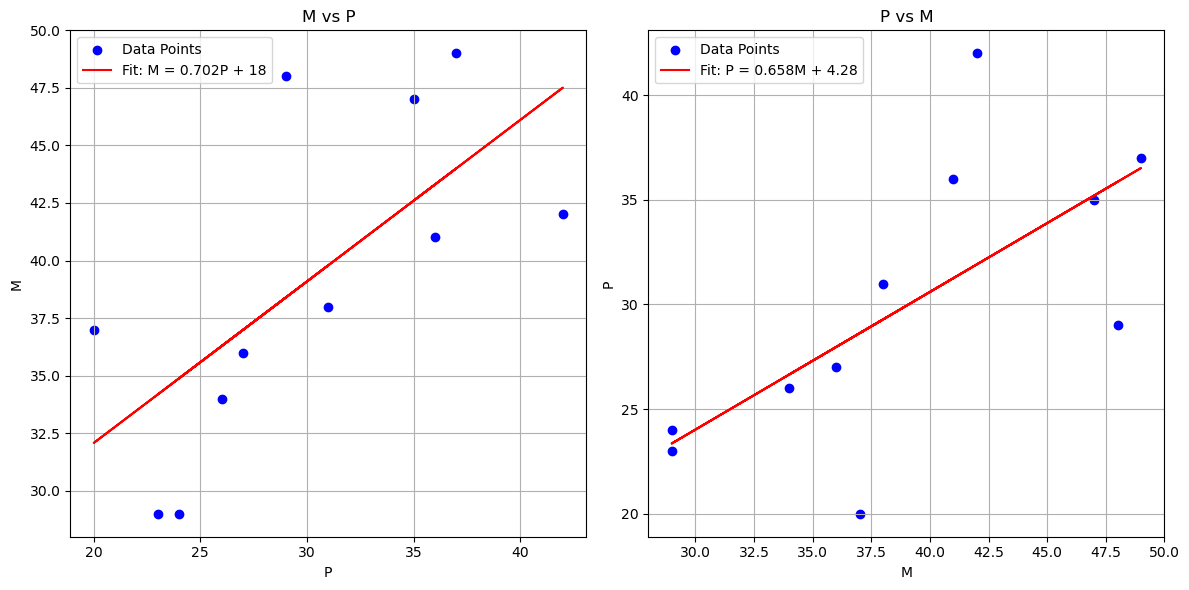

Regression for M vs P: M = 0.702P + 18, r^2 = 0.462
Pearson Correlation Coefficient (M vs P): 0.68

Regression for P vs M: P = 0.658M + 4.28, r^2 = 0.462
Pearson Correlation Coefficient (P vs M): 0.68


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

# Data
M = [41, 37, 38, 29, 49, 47, 42, 34, 36, 48, 29]
P = [36, 20, 31, 24, 37, 35, 42, 26, 27, 29, 23]

# Convert to numpy arrays
M = np.array(M)
P = np.array(P)

# Linear regression: M vs P
slope_M_P, intercept_M_P, r_value_M_P, p_value_M_P, std_err_M_P = linregress(P, M)
fit_M_P = slope_M_P * P + intercept_M_P

# Linear regression: P vs M
slope_P_M, intercept_P_M, r_value_P_M, p_value_P_M, std_err_P_M = linregress(M, P)
fit_P_M = slope_P_M * M + intercept_P_M

# Calculate Pearson correlation coefficient
pearson_corr_M_P, _ = pearsonr(P, M)
pearson_corr_P_M, _ = pearsonr(M, P)

# Plot
plt.figure(figsize=(12, 6))

# Plot M vs P
plt.subplot(1, 2, 1)
plt.scatter(P, M, color='blue', label='Data Points')
plt.plot(P, fit_M_P, color='red', label=f'Fit: M = {slope_M_P:.3g}P + {intercept_M_P:.3g}')
plt.xlabel('P')
plt.ylabel('M')
plt.title('M vs P')
plt.legend()
plt.grid(True)

# Plot P vs M
plt.subplot(1, 2, 2)
plt.scatter(M, P, color='blue', label='Data Points')
plt.plot(M, fit_P_M, color='red', label=f'Fit: P = {slope_P_M:.3g}M + {intercept_P_M:.3g}')
plt.xlabel('M')
plt.ylabel('P')
plt.title('P vs M')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print regression results and Pearson correlation coefficients
print(f"Regression for M vs P: M = {slope_M_P:.3g}P + {intercept_M_P:.3g}, r^2 = {r_value_M_P**2:.3g}")
print(f"Pearson Correlation Coefficient (M vs P): {pearson_corr_M_P:.3g}")

print(f"\nRegression for P vs M: P = {slope_P_M:.3g}M + {intercept_P_M:.3g}, r^2 = {r_value_P_M**2:.3g}")
print(f"Pearson Correlation Coefficient (P vs M): {pearson_corr_P_M:.3g}")


### P9.6 Exam scores Part-4: correlating the ranks (L3)

In Part-1 we asked if there was any evidence of correlation between Maths and Arts scores. Lets return now to the  Physics vs art scores and use Pearson, Spearman and Kendall tests. First work out the ranks, then, because the algebra is tedious, get python to solve it for you.

**Solution** First, we need to convert the scores into ranks. There are some tied ranks. We can just order the pairs at random. (Some textbooks suggest giving all tied ranks the same, possibly with half-rank values so that the sum stays the same. Either procedure is ok.) We then collect values of $X_i - Y_i$ in another column.


| student | maths | Xi=rank | art | Yi=rank | Xi-Yi |
|---------|-------|---------|-----|---------|-------|
| A       | 41    | 5       | 38  | 4       | 1     |
| B       | 37    | 7       | 44  | 2       | 5     |
| C       | 38    | 6       | 35  | 6       | 0     |
| D       | 29    | 10      | 49  | 1       | 9     |
| E       | 49    | 1       | 35  | 7       | -6    |
| F       | 47    | 3       | 29  | 10      | -7    |
| G       | 42    | 4       | 42  | 3       | 1     |
| H       | 34    | 9       | 36  | 5       | 4     |
| I       | 36    | 8       | 32  | 8       | 0     |
| J       | 48    | 2       | 29  | 9       | -7    |
| K       | 29    | 11      | 25  | 11      | 0     |

The Spearman rank correlation coeffcient is

$$ r_s = 1 -6 \frac{\sum (X_i-Y_i)^2}{N^3-N}$$

and the $t$ value to use for significance testing is

$$t_s=r_s\sqrt{\frac{N-2}{1-r_s^2}}$$

so now lets get the code to do the sums and see what we get.

In [44]:
rankdiff=[1,5,0,9,-6,-7,1,4,0,-7,0]
N=len(rankdiff)
sum1=0.0
for i in range(0,N):
    sum1=sum1+rankdiff[i]*rankdiff[i]

rs= 1. - 6.*sum1/(N**3-N)
ts=rs*sqrt((N-2.)/(1-rs*rs))
print("rank correlation rs=",round(rs,2),
      "t value ts=",round(ts,2))
nu=N-2
P2=2.*stats.t.cdf(ts,nu)
print("two tailed probability of ts or worse=", 
      round(100.*P2,1),"%")

rank correlation rs= -0.17 t value ts= -0.53
two tailed probability of ts or worse= 61.2 %


Given that $t=-0.53$ you can already see there is no significant correlation, consistent with our original $r$-test, but lets go ahead and get the significance from the $t$ distribution with $\nu=N-2$. We use a two-tailed test - we didn't know whether to expect a correlation or anti-correlation and could be interested in either, but found nothing, as the graph suggests. 

-0.04120585087406352 -0.04506437768240345 31.475918658580092 37.170113148653925


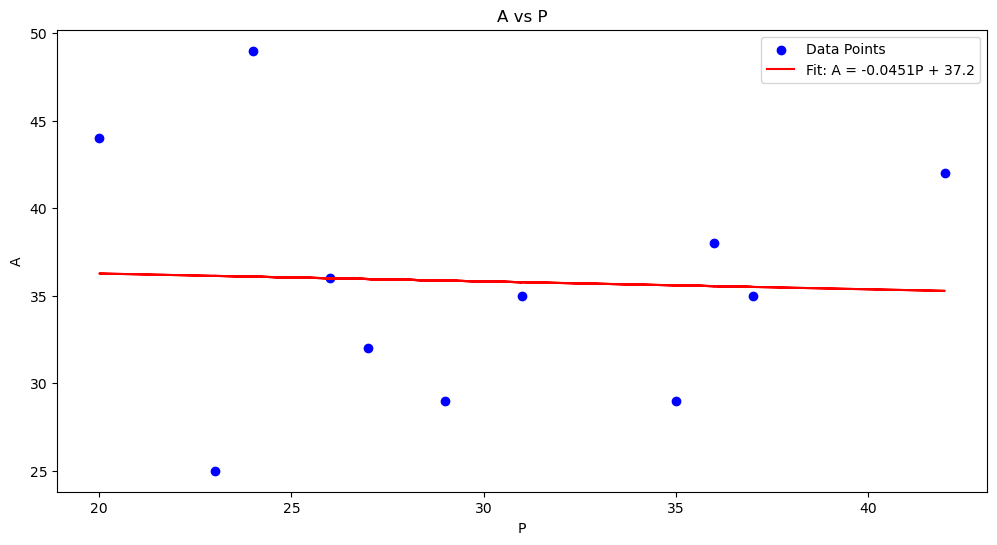

Regression for A vs P: A = -0.0451P + 37.2, r^2 = 0.00186
Pearson Correlation Coefficient (A vs P): -0.0431
Spearman Correlation Coefficient (A vs P): -0.032
Kendall Correlation Coefficient (A vs P): 0.0185

Regression for P vs A: P = -0.0412A + 31.5, r^2 = 0.00186
Pearson Correlation Coefficient (P vs A): -0.0431
Spearman Correlation Coefficient (P vs A): -0.032
Kendall Correlation Coefficient (P vs A): 0.0185


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr, spearmanr, kendalltau

# Data
P = [36, 20, 31, 24, 37, 35, 42, 26, 27, 29, 23]
A=[38,44,35,49,35,29,42,36,32,29,25]
# Convert to numpy arrays
A = np.array(A)
P = np.array(P)

# Linear regression: A vs P
slope_A_P, intercept_A_P, r_value_A_P, p_value_A_P, std_err_A_P = linregress(P, A)
fit_A_P = slope_A_P * P + intercept_A_P

# Linear regression: P vs A
slope_P_A, intercept_P_A, r_value_P_A, p_value_P_A, std_err_P_A = linregress(A, P)
fit_P_A = slope_P_A * A + intercept_P_A

print(slope_P_A,slope_A_P,intercept_P_A,intercept_A_P)

# Plot
plt.figure(figsize=(12, 6))

# Plot A vs P

plt.scatter(P, A, color='blue', label='Data Points')
plt.plot(P, fit_A_P, color='red', label=f'Fit: A = {slope_A_P:.3g}P + {intercept_A_P:.3g}')
plt.xlabel('P')
plt.ylabel('A')
plt.title('A vs P')
plt.legend()

plt.show()

# Calculate Pearson correlation coefficient
pearson_corr_A_P, _ = pearsonr(P, A)
pearson_corr_P_A, _ = pearsonr(A, P)

# Calculate Spearman correlation coefficient
spearman_corr_A_P, _ = spearmanr(P, A)
spearman_corr_P_A, _ = spearmanr(A, P)

# Calculate Kendall correlation coefficient
kendall_corr_A_P, _ = kendalltau(P, A)
kendall_corr_P_A, _ = kendalltau(A, P)


# Print regression results and correlation coefficients
print(f"Regression for A vs P: A = {slope_A_P:.3g}P + {intercept_A_P:.3g}, r^2 = {r_value_A_P**2:.3g}")
print(f"Pearson Correlation Coefficient (A vs P): {pearson_corr_A_P:.3g}")
print(f"Spearman Correlation Coefficient (A vs P): {spearman_corr_A_P:.3g}")
print(f"Kendall Correlation Coefficient (A vs P): {kendall_corr_A_P:.3g}")

print(f"\nRegression for P vs A: P = {slope_P_A:.3g}A + {intercept_P_A:.3g}, r^2 = {r_value_P_A**2:.3g}")
print(f"Pearson Correlation Coefficient (P vs A): {pearson_corr_P_A:.3g}")
print(f"Spearman Correlation Coefficient (P vs A): {spearman_corr_P_A:.3g}")
print(f"Kendall Correlation Coefficient (P vs A): {kendall_corr_P_A:.3g}")


### P9.7 Are these correlations the same? (L2)
Children from two different school catchment areas are tested on maths and history and the marks tested for correlation. A sample of 75 children from Richville gives $r_1=0.67$; a sample of 63 children from Poortown gives $r_2=0.42$. Is there any evidence that these correlations are different?

**Solution** We use Fisher's $z$-transform which says that
$$z_F=\frac{1}{2}\ln\left[(1+r)/(1-r)\right]$$
is distributed with variance $1/(N-3)$. I am using $z_F$ here so later we can distinguish it from a normal Gaussian $z$ test value.
We start by transforming the $r$ values to $z_F$ values:

In [41]:
r1=0.67; N1=75
z1=0.5*log((1+r1)/(1-r1))
sigz1=sqrt(1./(N1-3))
print("for r1=",r1,"and N1=",N1, "we get")
print("z1=",round(z1,2),"sigz1=",round(sigz1,2))

r2=0.42; N2=63
z2=0.5*log((1+r2)/(1-r2))
sigz2=sqrt(1./(N2-3))
print("for r2=",r2,"and N2=",N2, "we get")
print("z2=",round(z2,2),"sigz2=",round(sigz2,2))

for r1= 0.67 and N1= 75 we get
z1= 0.81 sigz1= 0.12
for r2= 0.42 and N2= 63 we get
z2= 0.45 sigz2= 0.13


On the null hypothesis that the correlations are the same, the difference between the $z_F$ values should be zero. To get the error on the difference, we use propagation of errors: 
$$\sigma_{diff}^2 = \sigma_{z1}^2 + \sigma_{z2}^2$$

Once we have the error on the difference between the two $z_F$ values, we can get a standard Gaussian $z$ test value as $z_{test}=z_{diff}/\sigma_{diff}$, and calculate its significance with a two-tailed test

In [42]:
delz=z1-z2
sigdel= sqrt(sigz1*sigz1 + sigz2*sigz2)
print("z-difference=",round(delz,2),"+/-",round(sigdel,2))
ztestval=delz/sigdel
print("ztest value=",round(ztestval,2))
P2=2.*stats.norm.sf(ztestval,0,1)
print("which gives significance", round(100.*P2,2),"%")

z-difference= 0.36 +/- 0.17
ztest value= 2.08
which gives significance 3.78 %


### P9.8 Permutation test  

Given two groups, [1, 2, 3, 4, 5] and [4, 5, 6, 7, 8], use a permutation test  assess whether they are from the same distribution and the confidence in that assertion. 
This will require some coding, if you dont fancy it, feel free to look at the solution and understand whats going on

Observed Difference in Means: 3.6667 - 5.2 = -1.533
P-value: 0.2122


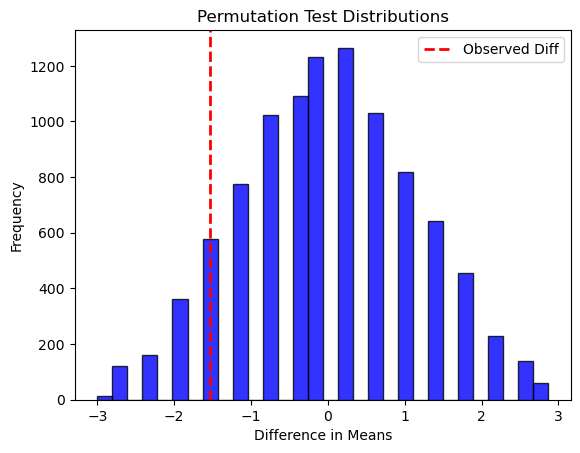

In [40]:


# Sample data for two groups
group1 = np.array([4, 5, 6, 7, 4])
group2 = np.array([4, 5, 2, 7 ,1 ,3 ])

# Observed difference in means
observed_diff = np.mean(group2) - np.mean(group1)

# Combine the data
all_data = np.concatenate((group1, group2))


# Perform the permutation test
num_permutations = 10000
combined_data = np.concatenate((group1, group2))
num_samples = len(group1)
permutation_diffs = np.zeros(num_permutations)
    
for i in range(num_permutations):
        np.random.shuffle(combined_data)
        perm_group1 = combined_data[:num_samples]
        perm_group2 = combined_data[num_samples:]
        permutation_diffs[i] = np.mean(perm_group2) - np.mean(perm_group1)

# Calculate the p-value
p_value = np.sum(np.abs(permutation_diffs) >= np.abs(observed_diff)) / num_permutations

print("Observed Difference in Means:", round(np.mean(group2),4) ,"-",  round(np.mean(group1),3),"=" , round(observed_diff,3))
print(f"P-value: {p_value}")

# Plot the distribution of permutation differences
plt.hist(permutation_diffs, bins=30, alpha=0.8, color='blue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Diff')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Permutation Test Distributions')
plt.legend()
plt.show()


# Level 3 Problems: needs some thought

These problems are not so straightforward, and included for completeness, being mathematical proofs of things we assumed in lectures.  If you are willing to take them on trust you can skip them.

### P9.9 Perfect correlation =1 proof
In the notes, it was stated that a perfect linear correlation should give $r=1$. Can you prove this? Assume that $y=a+bx$ is exactly true for all points $x_i,y_i$, and then consider the definition of $r$.


**Solution** The definition is

$$ r = \frac
{\sum(x_i-\bar{x})(y_i-\bar{y})}
{\sqrt {\sum(x_i-\bar{x})^2 \sum(y_i-\bar{y})^2   }}
$$ 

but we can assume $y_i=a+bx_i$ for all values of $i$. Then 

$$ \bar{y} = \frac{\sum y_i}{N} = \frac{\sum a+bx_i}{N} = a + \frac{\sum bx_i}{N} = a + b\bar{x} $$

In other words $y=a+bx$ is true for the means as well as the individual data points. This means that: 
 
$$ y_i-\bar{y} =  a+bx_i - a - b\bar{x} = b(x_i-\bar{x}) $$

The numerator in the definition of $r$ is then $\sum(x_i-\bar{x})(y_i-\bar{y}) = b\sum(x_i-\bar{x})^2$.

The denominator is $\sqrt{ \sum(x_i-\bar{x})^2.b^2\sum(x_i-\bar{x})^2  } = b\sum(x_i-\bar{x})^2$ 

This is the same as the numerator, so $r=1$.


### P9.10 Regression slope and correlation coefficient (L3)

Suppose we have a dataset $x_i, y_i$. Fitting the regression line of $y$ on $x$, i.e. assuming $x$ is the independent parameter, gives a solution $y=a+bx$; regressing $x$ on $y$ gives a solution $x=c+dy$ which corresponds to $y=a^\prime + b^\prime x$. How do the two slopes $b$ and $b^\prime$ relate to the correlation coefficient? 

**Solution** For a linear regression $y=a+bx$ the solution for the slope is

$$b= \frac{\sum{dx dy}}{\sum{dx^2}} $$

where $dx$ is shorthand for $x_i-\bar{x}$ etc. If we now regress $x$ on $y$, fitting $x=c+dy$ we have 

$$d= \frac{\sum{dx dy}} {\sum{dy^2} } $$

If we invert this latter solution to $y=a^\prime + b^\prime x$ we have $b^\prime = 1/d$. Now we can see that

$$\frac{b}{b^\prime} = bd= 
\frac{\left( \sum {dxdy}\right)^2}
{\sum{dx^2}\sum{dy^2}} $$

However, the correlation coefficient is

$$r=
\frac{\sum {dxdy}}
{\sqrt{\sum{dx^2}\sum{dy^2}}} $$

so we see that $r=\sqrt{b/b^\prime}$. This makes good qualitative sense. If we have a perfect correlation, with a thin strip of points, the two lines will be the same, so $b=b^\prime$ and $r=1$. On the other hand completely uncorrelated points would be a circular blob of points, and the two lines would be at right angles, so that $r=0$.
